In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno

from sklearn.compose import make_column_transformer

# Scaling
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Importing plotly and cufflinks in offline mode
import plotly.express as px
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import ipywidgets
from ipywidgets import interact

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud
!pip install colorama
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored

import plotly.io as pio
pio.renderers.default = 'notebook'

!pip install -U kaleido


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [4]:
# LOOKING AT THE DATA SET
# I AM ASSIGNING DIFFERENT KEY CHARACTERSTICS OF THE DATA SET AS DIFFERENT KEYWORDS

def first_looking(df):
    # SHAPE OF THE DATA SET
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    # NUMBER OF UNIQUE VALUES IN THE DATASET
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    # # NUMBER OF MISSING VALUES IN THE DATASET
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    # LIST ALL THE COLOUMNS OF THE DATASET
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    # REPLACE
    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')


# TO CHECK FOR MISSING VALUES

def missing_values(df):
    # ARRANGE MISSING VALUES IN A
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # count() only counts the non-NA values, therefore we first use isnull to include all the values (false and true), then count()
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]


def drop_columns(df, drop_columns):
    if drop_columns!=[]:
        df.drop(drop_columns, axis = 1, inplace = True)
        print(drop_columns, 'were dropped')

    else:
        print(colored('We will now check the missing values and if needed we will drop related columns!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')

# TO CHECK FOR DUPLICATE VALUES.

def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("Duplicates were dropped!"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates in the data-set"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')

def drop_null(df, limit):
    print('Shape:', df.shape)
    dropping=[]
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i]/df.shape[0]*100, 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)
            dropping.append(i)
    if dropping is None:
      print('No columns with missing values above threshold, not dropping any column')
    print('New shape after missing value control:', df.shape)

In [5]:
first_looking(df)
duplicate_values(df)
#Not specifying explicitely to drop any columns:

drop_columns(df,[])
#Drop the columns where missing values exceed a threshold i.e. if 90 percent of the column has missing values then drop it!
drop_null(df,90)

Shape:(23486, 11)
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None
------------------------------------------

In [6]:
# CHECKING FOR DUPLICATE VALUES


# DROP COLUMNS NOT NEEDED


# DROP MISSING VALUES, REPLACE WITH MEAN/MEDIAN


In [7]:
df.drop(['unnamed:_0','clothing_id'], axis = 1, inplace = True)

In [8]:
df.shape

(23486, 9)

In [9]:
df = df.rename(columns = {'Review Text' : 'text', 'recommended_ind' : 'recommended',
                          'positive_feedback_count' : 'feedback_count', 'division_name' : 'division',
                          'department_name' : 'department', 'class_name' :'class'})

In [10]:
df.describe().T #Takes all numeric values and describe basic properties of each

,count,mean,std,min,25%,50%,75%,max
age,23486.000,43.199,12.280,18.000,34.000,41.000,52.000,99.000
rating,23486.000,4.196,1.110,1.000,4.000,5.000,5.000,5.000
recommended,23486.000,0.822,0.382,0.000,1.000,1.000,1.000,1.000
feedback_count,23486.000,2.536,5.702,0.000,0.000,1.000,3.000,122.000


In [11]:
df.describe(include=object).T  #Describe categorical columns

,count,unique,top,freq
title,19676,13993,Love it!,136
review_text,22641,22634,Perfect fit and i've gotten so many compliments. i buy all my suits from here now!,3
division,23472,3,General,13850
department,23472,6,Tops,10468
class,23472,20,Dresses,6319


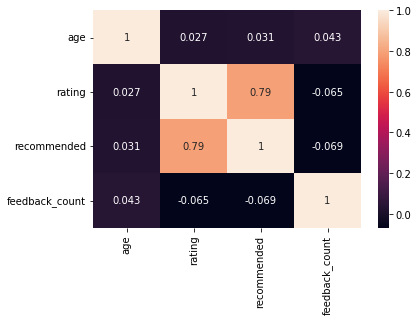

In [12]:
heatmap_plot = sns.heatmap(df.corr(), annot= True)
fig = heatmap_plot.get_figure()
fig.savefig("heatmap_plot.png", format = 'png', dpi = 600, facecolor = 'white', bbox_inches='tight')

In [13]:
df.columns

Index(['age', 'title', 'review_text', 'rating', 'recommended',
       'feedback_count', 'division', 'department', 'class'],
      dtype='object')

In [14]:
def first_look(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("Value counts i.e. number of frequency of different values in the column")
    print(df[col].value_counts(dropna = False).head())

In [15]:
first_look('age')

column name    :  age
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  77
Value counts i.e. number of frequency of different values in the column
39    1269
35     909
36     842
34     804
38     780
Name: age, dtype: int64


In [16]:
print(df.age.describe().T)
print(df.describe().T)

count   23486.000
mean       43.199
std        12.280
min        18.000
25%        34.000
50%        41.000
75%        52.000
max        99.000
Name: age, dtype: float64
                   count   mean    std    min    25%    50%    75%     max
age            23486.000 43.199 12.280 18.000 34.000 41.000 52.000  99.000
rating         23486.000  4.196  1.110  1.000  4.000  5.000  5.000   5.000
recommended    23486.000  0.822  0.382  0.000  1.000  1.000  1.000   1.000
feedback_count 23486.000  2.536  5.702  0.000  0.000  1.000  3.000 122.000


In [17]:
fig = px.histogram(df, x = df.age)
fig.write_image('Histogram-age.png')

In [93]:
#If I want to compare age and recommended and see what ages recommended a product and which did not
pd.crosstab(df.age, df.recommended).iplot(kind='bar', title= 'Histogram of ages')

#plotly.offline.iplot(fig, filename = 'Histogram-ages.png')

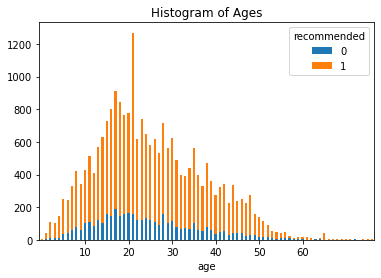

In [46]:
#If I want to compare age and recommended and see what ages recommended a product and which did not
fig = pd.crosstab(df.age, df.recommended).plot(kind='bar', stacked = True, title = 'Histogram of Ages',xticks=[10,20,30,40,50,60], rot=0).get_figure()
fig.savefig('Ages-Recommended.png', format = 'png', dpi = 600, facecolor = 'white', bbox_inches='tight')
#plotly.offline.iplot(fig, filename = 'Histogram-ages.png')

In [47]:
first_look("rating") #5 is best and 1 is worst

column name    :  rating
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5
Value counts i.e. number of frequency of different values in the column
5    13131
4     5077
3     2871
2     1565
1      842
Name: rating, dtype: int64


In [52]:
fig = px.histogram(df, x = df.rating)
fig.show()
fig.write_image('Rating-histo.png')

In [53]:
df.rating.describe().T

count   23486.000
mean        4.196
std         1.110
min         1.000
25%         4.000
50%         5.000
75%         5.000
max         5.000
Name: rating, dtype: float64

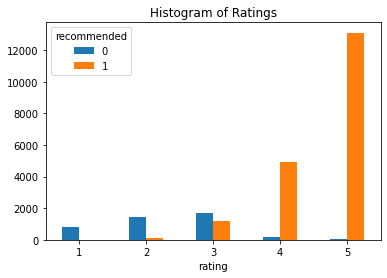

In [60]:
fig = pd.crosstab(df.rating, df.recommended).plot(kind="bar", stacked = False, title = 'Histogram of Ratings', rot=0).get_figure()
fig.show()
fig.savefig('Ratings-Recommended.png', format = 'png', dpi = 600, facecolor = 'white', bbox_inches='tight')

In [59]:
# Displaying with iplot (better)
pd.crosstab(df.rating, df.recommended).iplot(kind="bar")

In [61]:
first_look("recommended")

column name    :  recommended
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
Value counts i.e. number of frequency of different values in the column
1    19314
0     4172
Name: recommended, dtype: int64


In [62]:
df.recommended.describe().T

count   23486.000
mean        0.822
std         0.382
min         0.000
25%         1.000
50%         1.000
75%         1.000
max         1.000
Name: recommended, dtype: float64

In [64]:
df.columns

Index(['age', 'title', 'review_text', 'rating', 'recommended',
       'feedback_count', 'division', 'department', 'class'],
      dtype='object')

In [65]:
first_look("feedback_count")

column name    :  feedback_count
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  82
Value counts i.e. number of frequency of different values in the column
0    11176
1     4043
2     2193
3     1433
4      922
Name: feedback_count, dtype: int64


In [66]:
df.feedback_count.describe().T

count   23486.000
mean        2.536
std         5.702
min         0.000
25%         0.000
50%         1.000
75%         3.000
max       122.000
Name: feedback_count, dtype: float64

In [68]:
fig = px.histogram(df,x = df.feedback_count)
fig.show()
fig.write_image('histo-feedback-count.png')

In [69]:
pd.crosstab(df.feedback_count, df.recommended).iplot(kind="bar")

In [70]:
first_look("division")

column name    :  division
--------------------------------
per_of_nulls   :  % 0.06
num_of_nulls   :  14
num_of_uniques :  3
Value counts i.e. number of frequency of different values in the column
General           13850
General Petite     8120
Initmates          1502
NaN                  14
Name: division, dtype: int64


In [71]:
df.division.describe().T

count       23472
unique          3
top       General
freq        13850
Name: division, dtype: object

In [73]:
fig = px.histogram(df, x=df.division)
fig.show()
fig.write_image('histo-division.png')

In [74]:
pd.crosstab(df.division, df.recommended).iplot(kind="bar")

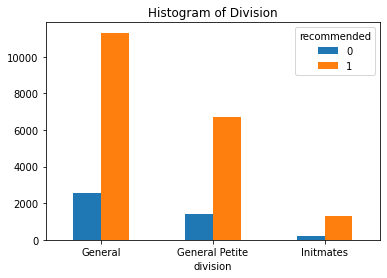

In [75]:
fig = pd.crosstab(df.division, df.recommended).plot(kind="bar", stacked = False, title = 'Histogram of Division', rot=0).get_figure()
fig.show()
fig.savefig('Divisions-Recommended.png', format = 'png', dpi = 600, facecolor = 'white', bbox_inches='tight')

In [76]:
first_look("department")

column name    :  department
--------------------------------
per_of_nulls   :  % 0.06
num_of_nulls   :  14
num_of_uniques :  6
Value counts i.e. number of frequency of different values in the column
Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Name: department, dtype: int64


In [77]:
df.department.describe().T

count     23472
unique        6
top        Tops
freq      10468
Name: department, dtype: object

In [78]:
fig = px.histogram(df,x=df.department)
fig.show()
fig.write_image('dept.png')

In [79]:
pd.crosstab(df.department, df.recommended).iplot(kind="bar")

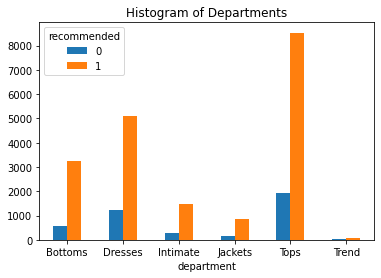

In [87]:
fig = pd.crosstab(df.department, df.recommended).plot(kind="bar", stacked = False, title = 'Histogram of Departments', rot=0).get_figure()
fig.show()
fig.savefig('Departments-Recommended.png', format = 'png', dpi = 600, facecolor = 'white', bbox_inches='tight')

In [81]:
first_look("class")

column name    :  class
--------------------------------
per_of_nulls   :  % 0.06
num_of_nulls   :  14
num_of_uniques :  20
Value counts i.e. number of frequency of different values in the column
Dresses     6319
Knits       4843
Blouses     3097
Sweaters    1428
Pants       1388
Name: class, dtype: int64


In [82]:
df["class"].describe().T

count       23472
unique         20
top       Dresses
freq         6319
Name: class, dtype: object

In [84]:
fig = px.histogram(df,x=df["class"])
fig.show()
fig.write_image('class.png')

In [85]:
pd.crosstab(df["class"], df.recommended).iplot(kind = "bar")

In [94]:
first_look("title")

column name    :  title
--------------------------------
per_of_nulls   :  % 16.22
num_of_nulls   :  3810
num_of_uniques :  13993
Value counts i.e. number of frequency of different values in the column
NaN          3810
Love it!      136
Beautiful      95
Love           88
Love!          84
Name: title, dtype: int64


In [95]:
df.title.describe().T

count        19676
unique       13993
top       Love it!
freq           136
Name: title, dtype: object

In [96]:
px.histogram(df, x= df.title)

In [97]:
first_look("review_text")

column name    :  review_text
--------------------------------
per_of_nulls   :  % 3.6
num_of_nulls   :  845
num_of_uniques :  22634
Value counts i.e. number of frequency of different values in the column
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       845
Perfect fit and i've gotten so many compliments. i buy all my suits from here now!                                                                                                                                                                                                           

In [98]:
df.review_text.describe().T

count                                                                                  22641
unique                                                                                 22634
top       Perfect fit and i've gotten so many compliments. i buy all my suits from here now!
freq                                                                                       3
Name: review_text, dtype: object

In [99]:
df.columns

Index(['age', 'title', 'review_text', 'rating', 'recommended',
       'feedback_count', 'division', 'department', 'class'],
      dtype='object')

1    19314
0     4172
Name: recommended, dtype: int64


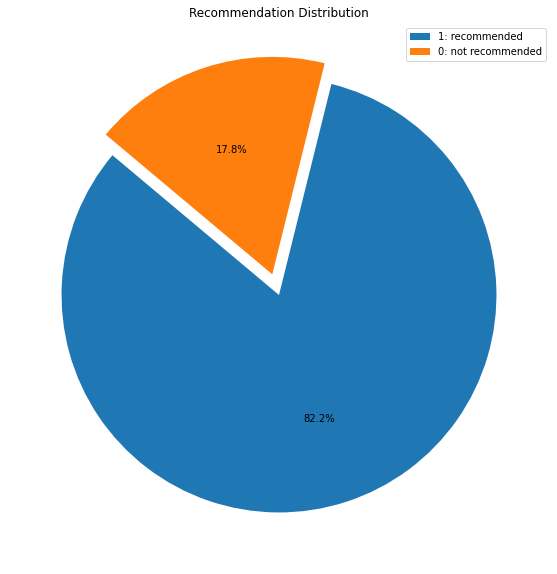

In [100]:
#To check the proportion for recommended and not recommended:
# I CAN DRAW A CHART!!

print(df.recommended.value_counts())
plt.figure(figsize = (10,10))

explode = [0,0.1]

plt.pie(df.recommended.value_counts(), explode = explode, autopct = '%1.1f%%', shadow = False, startangle = 140)

plt.legend(labels = ['1: recommended', '0: not recommended'])
plt.title("Recommendation Distribution")
plt.axis('off')
plt.savefig('Rec-pie-plot.png',format = 'png', dpi = 600, facecolor = 'white', bbox_inches='tight')

In [101]:
# FEATURE SELECTION AND DATA CLEANING!

df.columns

Index(['age', 'title', 'review_text', 'rating', 'recommended',
       'feedback_count', 'division', 'department', 'class'],
      dtype='object')

In [102]:
df_ml = df.copy()

In [103]:
# dropping all the columns except review text and recommended

drop_columns = ['age', 'title', 'rating',
       'feedback_count', 'division', 'department', 'class']

df_ml.drop(drop_columns, axis = 1, inplace = True)

In [104]:
df_ml.columns

Index(['review_text', 'recommended'], dtype='object')

In [105]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_text  22641 non-null  object
 1   recommended  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [106]:
first_looking(df_ml)

Shape:(23486, 2)
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_text  22641 non-null  object
 1   recommended  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB
None
-------------------------------------------------------------------------------
Number of Uniques:
review_text    22634
recommended        2
dtype: int64
-------------------------------------------------------------------------------
Missing Values:
             Missing_Number  Missing_Percent
review_text             845            0.036
-------------------------------------------------------------------------------
All Columns:['review_text', 'recommended']
-------------------------------------------------------------------------------
Columns after rename:['r

In [107]:
df_ml.rename(columns ={'review_text': 'text', 'recommended': 'recommend'}, inplace = True)
df_ml.columns

Index(['text', 'recommend'], dtype='object')

In [108]:
# ONE IS TEXT OF WHAT PEOPLE WROTE IN REVIEWS

# one is if they recommended the product or not: RECOMMEND


# MISSING VALUE DETECTION:

missing_values(df_ml)


,Missing_Number,Missing_Percent
text,845,0.036


In [109]:
df_ml.isnull().melt(value_name="missing")

,variable,missing
0,text,False
1,text,False
2,text,False
3,text,False
4,text,False
...,...,...
46967,recommend,False
46968,recommend,False
46969,recommend,False
46970,recommend,False


<Figure size 720x360 with 0 Axes>

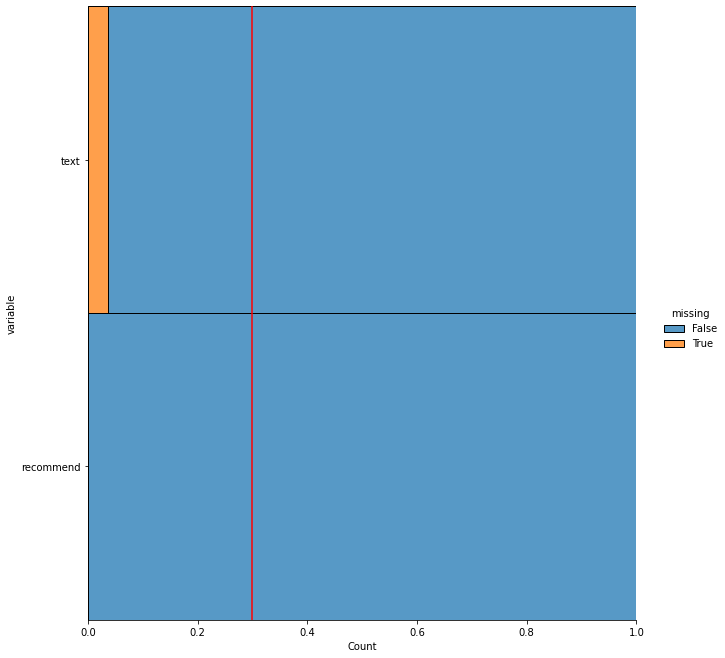

In [112]:
plt.figure(figsize = (10, 5))

fig = sns.displot(
    data = df_ml.isnull().melt(value_name = "missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    height = 9.25)

plt.axvline(0.3, color = "r")
fig.savefig('missing-prop.png',format = 'png', dpi = 600, facecolor = 'white', bbox_inches='tight')

In [113]:
df_ml = df_ml.dropna()

In [114]:
missing_values(df_ml)

,Missing_Number,Missing_Percent


In [115]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       22641 non-null  object
 1   recommend  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


In [116]:
df_ml["text"].str.isspace().sum()  #Check if any text is all whitespace or not

0

In [117]:
df_ml[df_ml["text"].str.isspace() == True].index # index of that text is all whitespace

Int64Index([], dtype='int64')

In [118]:
# TEXT MINING INVOLVING THREE MAIN STEPS:

# TOKENISATION (SPLITTING A PHRASE IN WORDS and converting to lower case):
# This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.


# NOISE REMOVAL (REMOVING UNNECESSARY WORDS/CHARACTERS LIKE COMMA, A, THE AN, etc. ):
# Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise. For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


# LEXICON NORMALISATION ( IDENTIFYING THE BASE WORDS FROM MULTIPLE WAYS OF WRITING THE SAME WORD):
# Lexicon Normalization: Another type of textual noise is about the multiple representations exhibited by single word. For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). There are two methods of lexicon normalisation; Stemming or Lemmatization. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming)
# LEMMATIZATION: identifying the base word
# STEMMING: removal of suffixes



In [119]:
df_ml.head()

,text,recommend
0,Absolutely wonderful - silky and sexy and comfortable,1
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",1
2,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,0
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1


In [120]:
import nltk
nltk.download('stopwords')

stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /home/tasha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [121]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [122]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
def cleaning(data):
  # TOKENIZE
  text_tokens = word_tokenize(data.replace("'","").lower())

  # Remove punctuations
  tokens_without_punc = [w for w in text_tokens if w.isalpha()]

  # Remove stop words
  tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

  # Lemma: Get base words only
  text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

  return " ".join(text_cleaned)




[nltk_data] Downloading package punkt to /home/tasha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tasha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [123]:
print(df_ml["text"].head())
df_ml["text"] = df_ml["text"].apply(cleaning)
print(df_ml["text"].head())

0                                                                                                                                                      Absolutely wonderful - silky and sexy and comfortable
1    Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...
2    I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...
3                                                                               I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!
4           This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any card

In [125]:
rare_words = pd.Series(" ".join(df_ml["text"]).split()).value_counts()
rare_words

dress       11352
fit         10128
size         9363
love         8992
top          8280
            ...  
reflex          1
imported        1
typi            1
butit           1
cotto           1
Length: 11996, dtype: int64

In [126]:
rare_words=rare_words[rare_words <=2]

In [127]:
rare_words.index

Index(['blogger', 'washability', 'convertible', 'hr', 'skater', 'fifth',
       'straightening', 'amazon', 'stetson', 'clinged',
       ...
       'persimmon', 'mcpherson', 'attack', 'looped', 'orignal', 'reflex',
       'imported', 'typi', 'butit', 'cotto'],
      dtype='object', length=6497)

In [128]:
# REMOVING RARE WORDS FROM THE DATA:


df_ml["text"] = df_ml["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df_ml["text"].head()

0                                                                                                                                                                absolutely wonderful silky sexy comfortable
1                       love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2    high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight laye...
3                                                                                                                   love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                                                                                             shirt flattering due adjustable front tie perfect length wear legging sleeveless pair 

In [129]:
# WORD CLOUD - REPETITION OF WORDS


# WE WILL CREATE SEPARATE WORD CLOUDS FOR POSITIVE AND NEGATIVE REVIEWS BASED ON THE RECOMMEND COLUMN


In [130]:
# DETECT REVIEWS:

df_ml[df_ml["recommend"] == 0].head(3)

,text,recommend
2,high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight laye...,0
5,love tracy reese dress one petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening skirt would take away embellish...,0
10,dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back,0


In [131]:
df_ml[df_ml["recommend"] == 1].head(3)

,text,recommend
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,1
3,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment,1


In [132]:
# COLLECT WORDS:

positive_words = " ".join(df_ml[df_ml["recommend"] == 1].text).split()

In [133]:

negative_words = " ".join(df_ml[df_ml["recommend"] == 0].text).split()

In [134]:
len(positive_words)

516772

In [135]:
len(negative_words)

116483

In [136]:
review_text = df_ml["text"]
all_words = " ".join(review_text)

In [138]:
wordcloud = WordCloud(width = 800, height = 400, background_color = 'black', max_words = 250).generate(all_words)

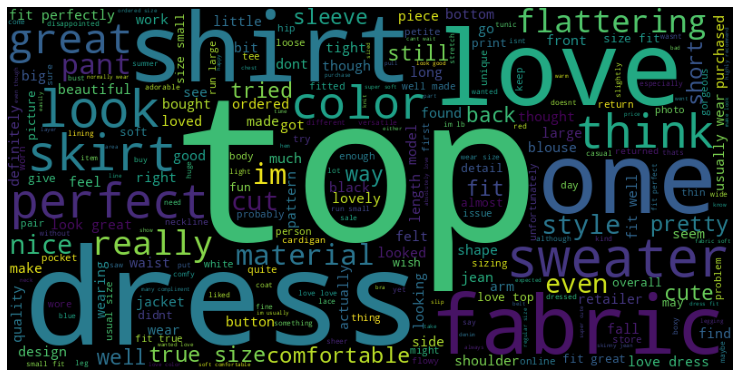

In [139]:
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('E-com-rev-WordCloud-byTasha.png', dpi = 600, format = 'png', facecolor = 'white', bbox_inches='tight')
plt.show()

In [140]:
positive_words = " ".join(positive_words)

In [141]:
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', max_words = 250).generate(positive_words)

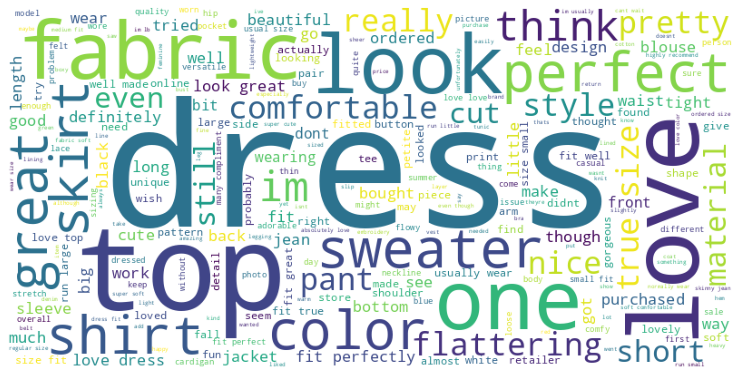

In [142]:
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('ChatGPT-WordCloud-positive-byTasha.png', dpi = 600, format = 'png', facecolor = 'white', bbox_inches='tight')
plt.show()

In [143]:
negative_words = " ".join(negative_words)

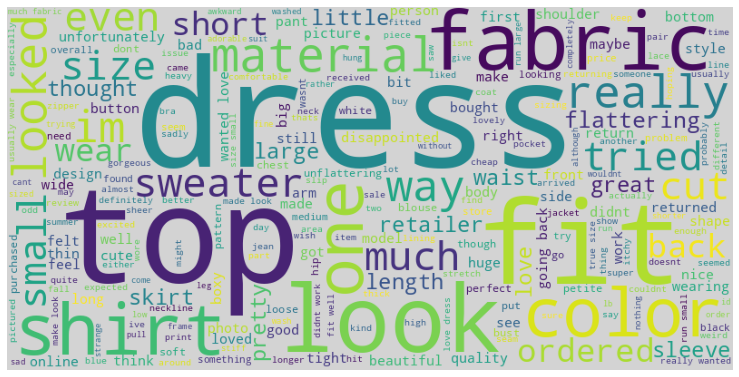

In [144]:
wordcloud = WordCloud(width = 800, height = 400, background_color = 'lightgray', max_words = 250).generate(negative_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('ChatGPT-WordCloud-negative-byTasha.png', dpi = 600, format = 'png', facecolor = 'white', bbox_inches='tight')
plt.show()

In [145]:
counter_all = Counter(word_tokenize(all_words))
counter_all.most_common(30)

[('dress', 11352),
 ('fit', 10128),
 ('size', 9363),
 ('love', 8992),
 ('top', 8280),
 ('like', 7036),
 ('color', 6916),
 ('look', 6890),
 ('wear', 6520),
 ('great', 6101),
 ('im', 5968),
 ('would', 5014),
 ('fabric', 4862),
 ('small', 4589),
 ('really', 3924),
 ('ordered', 3835),
 ('little', 3773),
 ('perfect', 3760),
 ('one', 3704),
 ('flattering', 3485),
 ('soft', 3322),
 ('well', 3251),
 ('back', 3186),
 ('comfortable', 3047),
 ('cute', 3030),
 ('nice', 3017),
 ('bought', 2986),
 ('beautiful', 2950),
 ('bit', 2877),
 ('material', 2811)]

In [146]:
# BEFORE TRAINING THE MODEL, FIRST VECTORISE THE DATAFRAME

# TEXT VECTORISATION is done with CountVectorizer


In [147]:
# SPLIT DATASET

X = df_ml["text"].values
y = df_ml["recommend"].map({0:1, 1:0}).values

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 101)

# stratify is used to avoid any biases to creep into the split of test and train set. So we have all proportions of both data set, y is used as an axis as we need to be unbiased in y i.e. recommend

In [149]:
# COUNT VECTORISATION : only gives the frequency of each word in the row, like number of times 'awesome' comes in a review
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [150]:
X_train_count

<18112x5468 sparse matrix of type '<class 'numpy.int64'>'
	with 459325 stored elements in Compressed Sparse Row format>

In [151]:
X_test_count

<4529x5468 sparse matrix of type '<class 'numpy.int64'>'
	with 114118 stored elements in Compressed Sparse Row format>

In [152]:
len(X_train)

18112

In [153]:
len(X_test)

4529

In [157]:
# To give weight to each word in the review based on its frequency in a doc
# tf(t) = (No. of times term ‘t’ occurs in a document) / (No. Of terms in a document)


# ONE CAN USE THIS INSTEAD OF COUNT VECTORISER, IN THIS NOTEBOOK, I WILL CHECK ACCURACIES (USING CROSS VALIDATION
# AND PRECISION-RECALL CURVES) FOR BOTH COUNTVECTOR AND TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)


In [158]:
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [160]:
# MODELLING WITH ML MODELS

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score, average_precision_score

In [161]:
def eval(model, X_train, X_test):
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  print("Test_SET")
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  print(classification_report(y_test,y_pred))
  print("Train_SET")
  print(classification_report(y_train, y_pred_train))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()
  #plot_confusion_matrix(model, X_test, y_test, cmap="plasma")

In [162]:
# LOGISTIC REGRESSION with COUNTVECTOR DATA

from sklearn.linear_model import LogisticRegression

logreg_count = LogisticRegression(C=0.1, max_iter = 1000, class_weight= 'balanced', random_state =101)

logreg_count.fit(X_train_count, y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

Logistic Regression Model
---------------------------
Test_SET
[[3207  502]
 [ 120  700]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3709
           1       0.58      0.85      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.89      0.86      0.87      4529

Train_SET
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14831
           1       0.65      0.92      0.76      3281

    accuracy                           0.89     18112
   macro avg       0.81      0.91      0.85     18112
weighted avg       0.92      0.89      0.90     18112



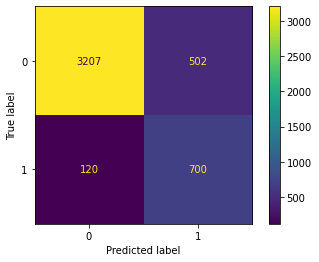

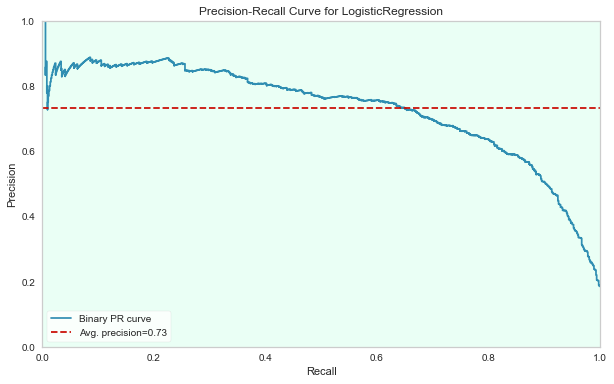

LogReg_Count_rec :  [0.86465355 0.85365854]
LogReg_Count_f1  :  [0.9115975  0.69238378]
LogReg_Count_AP (avg. precision from precision recall curve)  :  0.731510501416433
 accuracy             score for LogReg_Count : 0.8630749296365234

 precision-0          score for LogReg_Count : 0.9574185740287424

 recall-0             score for LogReg_Count : 0.8715529368785135

 f1-0                 score for LogReg_Count : 0.9124561559733845

 precision-1          score for LogReg_Count : 0.5870895343918848

 recall-1             score for LogReg_Count : 0.8247535028541775

 f1-1                 score for LogReg_Count : 0.6858272606555378



In [163]:
print("Logistic Regression Model")

print("---------------------------")

eval(logreg_count,X_train_count,X_test_count)
import random
import pylab as pl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


# To draw a precision-recall curve

from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(LogisticRegression(C = 0.1, max_iter = 1000, class_weight = "balanced"), classes = logreg_count.classes_, per_class = True, cmap = "Set1")

# ! NOTE ! THIS PRECISIONRECALL FUNCTION ONLY WORKED WHEN I INTERCHANGED THE LABEL OF THE CLASSES using MAP WHEN ASSIGNING X AND Y!!
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

y_pred = logreg_count.predict(X_test_count)
# SINCE average is None, scores output are for both the 0: recommended and 1: not recommended class
log_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
log_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
log_AP = viz.score_


#print("viz.score_       : ", viz.score_)
print("LogReg_Count_rec : ", log_count_rec)
print("LogReg_Count_f1  : ", log_count_f1)
print("LogReg_Count_AP (avg. precision from precision recall curve)  : ", log_AP)



# CROSS VALIDATION

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# EVALUATES AND PUT LABELS ON DIFFERENT SCORES LIKE ACCURACY. AND PRECISION, RECALL, F1 SCORE FOR BOTH CLASSES 0 AND 1

custom_scorer = {'accuracy': make_scorer(accuracy_score), 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }


for i, j in custom_scorer.items():
  # i is the key label, j is the action/command of that key item
  # instantiate logreg model
  model = LogisticRegression(C=0.1, max_iter = 1000, class_weight = "balanced", random_state = 101)
  # crossvalscore will output multiple accuracies (or whichever parameter we specify for the model, considering different random selections of test and train data sets)
  # Mean of the scores given by cross val:
  scores = cross_val_score(estimator = model, X = X_train_count, y = y_train, cv = 10, scoring= j).mean()
  # saving recall and f1 of class 0 : recommend
  if i == "recall-0":
    log_count_rec = scores
  elif i == "f1-0":
    log_count_f1 = scores
  # print all the scores
  print(f" {i:20} score for LogReg_Count : {scores}\n")



In [164]:
# DOING THE SAME FOR THE TF-IDF DATA I.E. X_train_tf_idf, y_train WHERE WEIGHTS ARE GIVEN TO EACH WORD

Logistic Regression Model with TF-IDF DATA
---------------------------
Test_SET
[[3194  515]
 [ 109  711]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3709
           1       0.58      0.87      0.70       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.90      0.86      0.87      4529

Train_SET
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14831
           1       0.64      0.93      0.76      3281

    accuracy                           0.89     18112
   macro avg       0.81      0.91      0.85     18112
weighted avg       0.92      0.89      0.90     18112



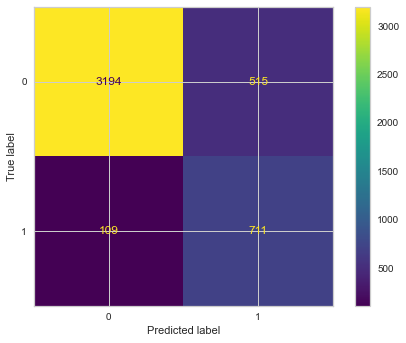

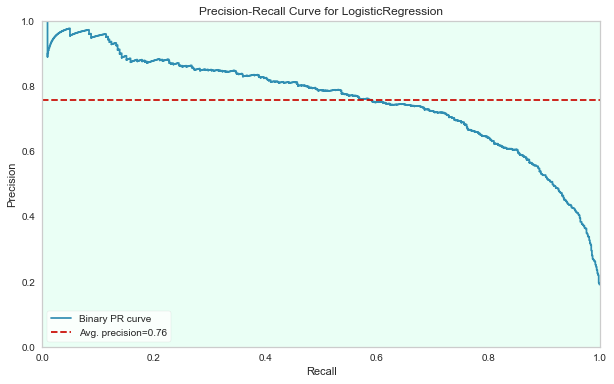

LogReg_tfidf_rec :  [0.86114856 0.86707317]
LogReg_tfidf_f1  :  [0.9110097  0.69501466]
LogReg_ifidf_AP (avg. precision from precision recall curve)  :  0.7573257072720488
 accuracy             score for LogReg_TFIDF : 0.8664429297047842

 precision-0          score for LogReg_TFIDF : 0.9616986036657602

 recall-0             score for LogReg_TFIDF : 0.8716204586390595

 f1-0                 score for LogReg_TFIDF : 0.9144271805850336

 precision-1          score for LogReg_TFIDF : 0.5926105253283424

 recall-1             score for LogReg_TFIDF : 0.8430424790570094

 f1-1                 score for LogReg_TFIDF : 0.6958594415161741



In [165]:
# LOGISTIC REGRESSION with tf-idf data

from sklearn.linear_model import LogisticRegression

# C = 1 FOR TF-IDF
logreg_tfidf = LogisticRegression(C=1, max_iter = 1000, class_weight= 'balanced', random_state =101)

logreg_tfidf.fit(X_train_tf_idf, y_train)


print("Logistic Regression Model with TF-IDF DATA")

print("---------------------------")

eval(logreg_tfidf,X_train_tf_idf,X_test_tf_idf)


# To draw a precision-recall curve

from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(LogisticRegression(C = 1, max_iter = 1000, class_weight = "balanced"), classes = logreg_tfidf.classes_, per_class = True, cmap = "Set1")

# ! NOTE ! THIS PRECISIONRECALL FUNCTION ONLY WORKED WHEN I INTERCHANGED THE LABEL OF THE CLASSES using MAP WHEN ASSIGNING X AND Y!!
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();


y_pred = logreg_tfidf.predict(X_test_tf_idf)
# SINCE average is None, scores output are for both the 0: recommended and 1: not recommended class
log_tfidf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
log_tfidf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
log_tfidf_AP = viz.score_

#print("viz.score_       : ", viz.score_)
print("LogReg_tfidf_rec : ", log_tfidf_rec)
print("LogReg_tfidf_f1  : ", log_tfidf_f1)
print("LogReg_ifidf_AP (avg. precision from precision recall curve)  : ", log_tfidf_AP)


# CROSS VALIDATION

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# EVALUATES AND PUT LABELS ON DIFFERENT SCORES LIKE ACCURACY. AND PRECISION, RECALL, F1 SCORE FOR BOTH CLASSES 0 AND 1

custom_scorer = {'accuracy': make_scorer(accuracy_score), 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }


for i, j in custom_scorer.items():
  # i is the key label, j is the action/command of that key item
  # instantiate logreg model
  model = LogisticRegression(C=1, max_iter = 1000, class_weight = "balanced", random_state = 101)
  # crossvalscore will output multiple accuracies (or whichever parameter we specify for the model, considering different random selections of test and train data sets)
  # Mean of the scores given by cross val:
  scores = cross_val_score(estimator = model, X = X_train_tf_idf, y = y_train, cv = 10, scoring= j).mean()
  # saving recall and f1 of class 0 : recommend
  if i == "recall-0":
    log_tfidf_rec = scores
  elif i == "f1-0":
    log_tfidf_f1 = scores
  # print all the scores
  print(f" {i:20} score for LogReg_TFIDF : {scores}\n")



In [167]:
print(logreg_tfidf.classes_)
print(logreg_count.classes_)


[0 1]
[0 1]


NBMulti_Count Model
-------------------
Test_SET
[[3367  342]
 [ 189  631]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3709
           1       0.65      0.77      0.70       820

    accuracy                           0.88      4529
   macro avg       0.80      0.84      0.82      4529
weighted avg       0.89      0.88      0.89      4529

Train_SET
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     14831
           1       0.70      0.81      0.75      3281

    accuracy                           0.90     18112
   macro avg       0.83      0.87      0.84     18112
weighted avg       0.91      0.90      0.91     18112



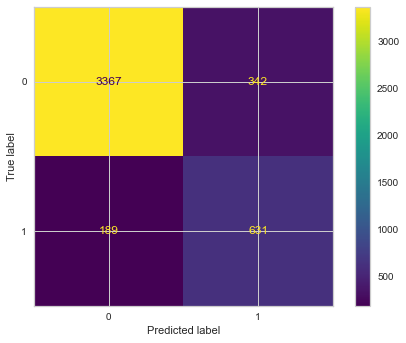

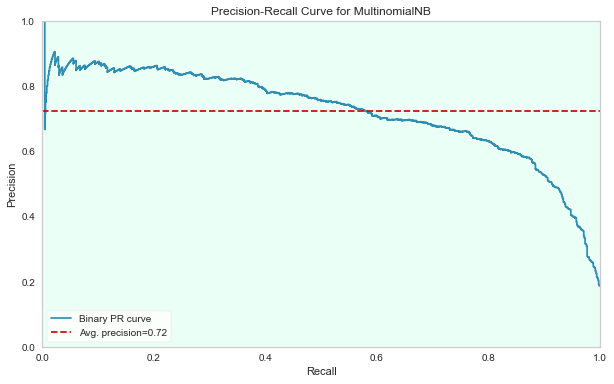

nbmulti_Count_rec :  [0.90779186 0.7695122 ]
nbmulti_Count_f1  :  [0.92690984 0.7038483 ]
nbmulti_Count_AP (avg. precision from precision recall curve)  :  0.7217493781727977
 accuracy             score for nbmulti_Count : 0.8815703762754714

 precision-0          score for nbmulti_Count : 0.9413635200066286

 recall-0             score for nbmulti_Count : 0.9122108514648495

 f1-0                 score for nbmulti_Count : 0.9265458584216644

 precision-1          score for nbmulti_Count : 0.6520470480273092

 recall-1             score for nbmulti_Count : 0.7430619393579955

 f1-1                 score for nbmulti_Count : 0.6944540344257399



In [168]:
print("NBMulti_Count Model")
print("-------------------")
# NAIVE BAYES MODEL:

from sklearn.naive_bayes import MultinomialNB
nbmulti_count = MultinomialNB()
nbmulti_count.fit(X_train_count, y_train)

eval(nbmulti_count, X_train_count, X_test_count)

import random
import pylab as pl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


# To draw a precision-recall curve

from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(MultinomialNB(), classes = nbmulti_count.classes_, per_class = True, cmap = "Set1")

# ! NOTE ! THIS PRECISIONRECALL FUNCTION ONLY WORKED WHEN I INTERCHANGED THE LABEL OF THE CLASSES using MAP WHEN ASSIGNING X AND Y!!
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

y_pred = nbmulti_count.predict(X_test_count)
# SINCE average is None, scores output are for both the 0: recommended and 1: not recommended class
nbmulti_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
nbmulti_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
nbmulti_AP = viz.score_


#print("viz.score_       : ", viz.score_)
print("nbmulti_Count_rec : ", nbmulti_count_rec)
print("nbmulti_Count_f1  : ", nbmulti_count_f1)
print("nbmulti_Count_AP (avg. precision from precision recall curve)  : ", nbmulti_AP)



# CROSS VALIDATION

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# EVALUATES AND PUT LABELS ON DIFFERENT SCORES LIKE ACCURACY. AND PRECISION, RECALL, F1 SCORE FOR BOTH CLASSES 0 AND 1

custom_scorer = {'accuracy': make_scorer(accuracy_score), 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }


for i, j in custom_scorer.items():
  # i is the key label, j is the action/command of that key item
  # instantiate nbmulti model
  model = MultinomialNB()
  # crossvalscore will output multiple accuracies (or whichever parameter we specify for the model, considering different random selections of test and train data sets)
  # Mean of the scores given by cross val:
  scores = cross_val_score(estimator = model, X = X_train_count, y = y_train, cv = 10, scoring= j).mean()
  # saving recall and f1 of class 0 : recommend
  if i == "recall-1":
    nbmulti_count_rec = scores
  elif i == "f1-1":
    nbmulti_count_f1 = scores
  # print all the scores
  print(f" {i:20} score for nbmulti_Count : {scores}\n")



NBMulti_TFIDF Model
-------------------
Test_SET
[[3690   19]
 [ 688  132]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3709
           1       0.87      0.16      0.27       820

    accuracy                           0.84      4529
   macro avg       0.86      0.58      0.59      4529
weighted avg       0.85      0.84      0.80      4529

Train_SET
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     14831
           1       0.94      0.23      0.37      3281

    accuracy                           0.86     18112
   macro avg       0.90      0.61      0.64     18112
weighted avg       0.87      0.86      0.82     18112



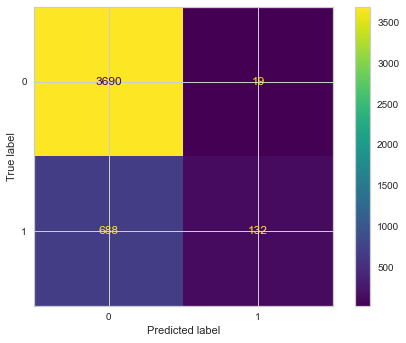

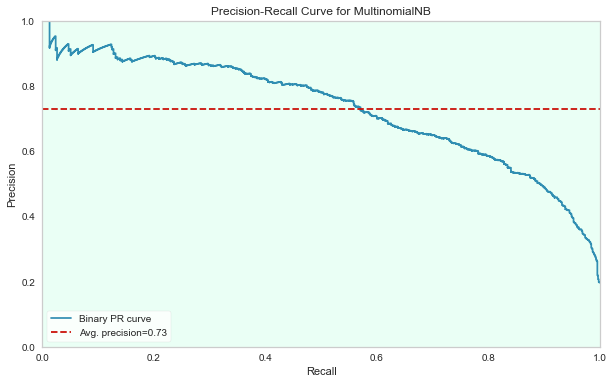

nbmulti_tfidf_rec :  [0.99487733 0.16097561]
nbmulti_tfidf_f1  :  [0.91257574 0.27188465]
nbmulti_tfidf_AP (avg. precision from precision recall curve)  :  0.7303063978527191
 accuracy             score for nbmulti_tfidf : 0.8446887916985115

 precision-0          score for nbmulti_tfidf : 0.8428300282267893

 recall-0             score for nbmulti_tfidf : 0.9960894177134205

 f1-0                 score for nbmulti_tfidf : 0.9130715544723733

 precision-1          score for nbmulti_tfidf : 0.8994343183185245

 recall-1             score for nbmulti_tfidf : 0.16031859292757059

 f1-1                 score for nbmulti_tfidf : 0.2719006756069967



In [169]:
print("NBMulti_TFIDF Model")
print("-------------------")
# NAIVE BAYES MODEL:

from sklearn.naive_bayes import MultinomialNB
nbmulti_tfidf = MultinomialNB()
nbmulti_tfidf.fit(X_train_tf_idf, y_train)

eval(nbmulti_tfidf, X_train_tf_idf, X_test_tf_idf)

import random
import pylab as pl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


# To draw a precision-recall curve

from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(MultinomialNB(), classes = nbmulti_tfidf.classes_, per_class = True, cmap = "Set1")

# ! NOTE ! THIS PRECISIONRECALL FUNCTION ONLY WORKED WHEN I INTERCHANGED THE LABEL OF THE CLASSES using MAP WHEN ASSIGNING X AND Y!!
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

y_pred = nbmulti_tfidf.predict(X_test_tf_idf)
# SINCE average is None, scores output are for both the 0: recommended and 1: not recommended class
nbmulti_tfidf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
nbmulti_tfidf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
nbmulti_tfidf_AP = viz.score_


#print("viz.score_       : ", viz.score_)
print("nbmulti_tfidf_rec : ", nbmulti_tfidf_rec)
print("nbmulti_tfidf_f1  : ", nbmulti_tfidf_f1)
print("nbmulti_tfidf_AP (avg. precision from precision recall curve)  : ", nbmulti_tfidf_AP)



# CROSS VALIDATION

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# EVALUATES AND PUT LABELS ON DIFFERENT SCORES LIKE ACCURACY. AND PRECISION, RECALL, F1 SCORE FOR BOTH CLASSES 0 AND 1

custom_scorer = {'accuracy': make_scorer(accuracy_score), 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }


for i, j in custom_scorer.items():
  # i is the key label, j is the action/command of that key item
  # instantiate nbmulti model
  model = MultinomialNB()
  # crossvalscore will output multiple accuracies (or whichever parameter we specify for the model, considering different random selections of test and train data sets)
  # Mean of the scores given by cross val:
  scores = cross_val_score(estimator = model, X = X_train_tf_idf, y = y_train, cv = 10, scoring= j).mean()
  # saving recall and f1 of class 0 : recommend
  if i == "recall-1":
    nbmulti_tfidf_rec = scores
  elif i == "f1-1":
    nbmulti_tfidf_f1 = scores
  # print all the scores
  print(f" {i:20} score for nbmulti_tfidf : {scores}\n")



In [170]:
# Can also do BernauliNB the same way

SVM Count Model
-------------------
Test_SET
[[3200  509]
 [ 117  703]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3709
           1       0.58      0.86      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.90      0.86      0.87      4529

Train_SET
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14831
           1       0.65      0.92      0.76      3281

    accuracy                           0.90     18112
   macro avg       0.81      0.91      0.85     18112
weighted avg       0.92      0.90      0.90     18112



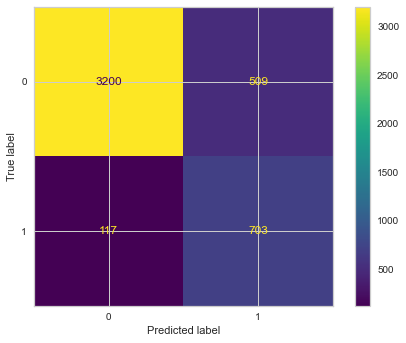

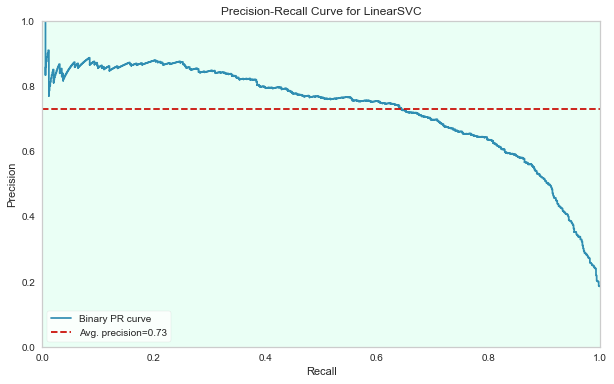

svc_Count_rec :  [0.86276624 0.85731707]
svc_Count_f1  :  [0.91090236 0.69192913]
svc_Count_AP (avg. precision from precision recall curve)  :  0.729464511348659
 accuracy             score for svc_Count : 0.8635167050024195

 precision-0          score for svc_Count : 0.9577211324956219

 recall-0             score for svc_Count : 0.871822751289093

 f1-0                 score for svc_Count : 0.9127421050232496

 precision-1          score for svc_Count : 0.5878894333557761

 recall-1             score for svc_Count : 0.8259739417302987

 f1-1                 score for svc_Count : 0.6868000622131497



In [171]:
# SUPPORT VECTOR MACHINE (SVM)

print("SVM Count Model")
print("-------------------")
# SVM MODEL:

from sklearn.svm import LinearSVC
svc_count = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
svc_count.fit(X_train_count, y_train)

eval(svc_count, X_train_count, X_test_count)

import random
import pylab as pl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


# To draw a precision-recall curve

from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101), classes = svc_count.classes_, per_class = True, cmap = "Set1")

# ! NOTE ! THIS PRECISIONRECALL FUNCTION ONLY WORKED WHEN I INTERCHANGED THE LABEL OF THE CLASSES using MAP WHEN ASSIGNING X AND Y!!
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

y_pred = svc_count.predict(X_test_count)
# SINCE average is None, scores output are for both the 0: recommended and 1: not recommended class
svc_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
svc_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
svc_count_AP = viz.score_


#print("viz.score_       : ", viz.score_)
print("svc_Count_rec : ", svc_count_rec)
print("svc_Count_f1  : ", svc_count_f1)
print("svc_Count_AP (avg. precision from precision recall curve)  : ", svc_count_AP)



# CROSS VALIDATION

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# EVALUATES AND PUT LABELS ON DIFFERENT SCORES LIKE ACCURACY. AND PRECISION, RECALL, F1 SCORE FOR BOTH CLASSES 0 AND 1

custom_scorer = {'accuracy': make_scorer(accuracy_score), 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }


for i, j in custom_scorer.items():
  # i is the key label, j is the action/command of that key item
  # instantiate svc model
  model = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
  # crossvalscore will output multiple accuracies (or whichever parameter we specify for the model, considering different random selections of test and train data sets)
  # Mean of the scores given by cross val:
  scores = cross_val_score(estimator = model, X = X_train_count, y = y_train, cv = 10, scoring= j).mean()
  # saving recall and f1 of class 0 : recommend
  if i == "recall-1":
    svc_count_rec = scores
  elif i == "f1-1":
    svc_count_f1 = scores
  # print all the scores
  print(f" {i:20} score for svc_Count : {scores}\n")




SVM TF-IDF Model
-------------------
Test_SET
[[3112  597]
 [ 109  711]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3709
           1       0.54      0.87      0.67       820

    accuracy                           0.84      4529
   macro avg       0.75      0.85      0.78      4529
weighted avg       0.89      0.84      0.86      4529

Train_SET
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     14831
           1       0.57      0.89      0.69      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



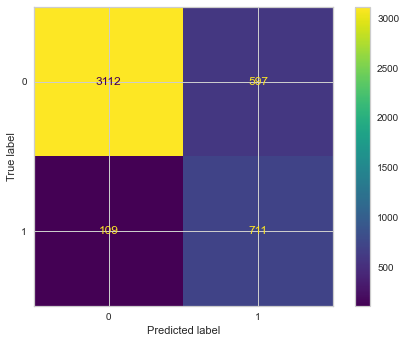

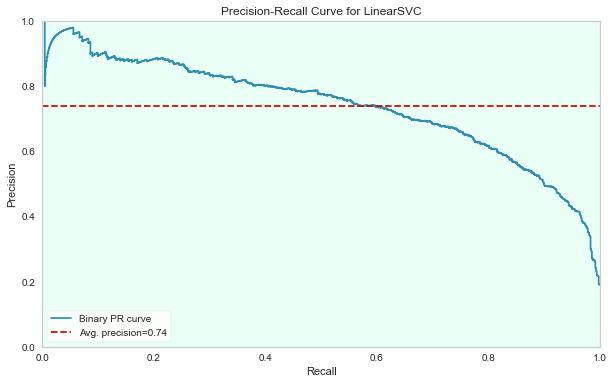

svc_tfidf_rec :  [0.83904017 0.86707317]
svc_tfidf_f1  :  [0.8981241  0.66823308]
svc_tfidf_AP (avg. precision from precision recall curve)  :  0.7383923889145668
 accuracy             score for svc_tfidf : 0.8455167891094769

 precision-0          score for svc_tfidf : 0.9647886603212553

 recall-0             score for svc_tfidf : 0.8420871403307567

 f1-0                 score for svc_tfidf : 0.8992617076447751

 precision-1          score for svc_tfidf : 0.5467920639702233

 recall-1             score for svc_tfidf : 0.8610191637630662

 f1-1                 score for svc_tfidf : 0.6687929933937736



In [172]:

# SUPPORT VECTOR MACHINE (SVM)

print("SVM TF-IDF Model")
print("-------------------")
# SVM MODEL:

from sklearn.svm import LinearSVC
svc_tfidf = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
svc_tfidf.fit(X_train_tf_idf, y_train)

eval(svc_tfidf, X_train_tf_idf, X_test_tf_idf)

import random
import pylab as pl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


# To draw a precision-recall curve

from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101), classes = svc_tfidf.classes_, per_class = True, cmap = "Set1")

# ! NOTE ! THIS PRECISIONRECALL FUNCTION ONLY WORKED WHEN I INTERCHANGED THE LABEL OF THE CLASSES using MAP WHEN ASSIGNING X AND Y!!
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

y_pred = svc_tfidf.predict(X_test_tf_idf)
# SINCE average is None, scores output are for both the 0: recommended and 1: not recommended class
svc_tfidf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
svc_tfidf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
svc_tfidf_AP = viz.score_


#print("viz.score_       : ", viz.score_)
print("svc_tfidf_rec : ", svc_tfidf_rec)
print("svc_tfidf_f1  : ", svc_tfidf_f1)
print("svc_tfidf_AP (avg. precision from precision recall curve)  : ", svc_tfidf_AP)



# CROSS VALIDATION

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# EVALUATES AND PUT LABELS ON DIFFERENT SCORES LIKE ACCURACY. AND PRECISION, RECALL, F1 SCORE FOR BOTH CLASSES 0 AND 1

custom_scorer = {'accuracy': make_scorer(accuracy_score), 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }


for i, j in custom_scorer.items():
  # i is the key label, j is the action/command of that key item
  # instantiate svc model
  model = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
  # crossvalscore will output multiple accuracies (or whichever parameter we specify for the model, considering different random selections of test and train data sets)
  # Mean of the scores given by cross val:
  scores = cross_val_score(estimator = model, X = X_train_tf_idf, y = y_train, cv = 10, scoring= j).mean()
  # saving recall and f1 of class 0 : recommend
  if i == "recall-1":
    svc_tfidf_rec = scores
  elif i == "f1-1":
    svc_tfidf_f1 = scores
  # print all the scores
  print(f" {i:20} score for svc_tfidf : {scores}\n")





RF_Count Model
--------------
Test_SET
[[3172  537]
 [ 162  658]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3709
           1       0.55      0.80      0.65       820

    accuracy                           0.85      4529
   macro avg       0.75      0.83      0.78      4529
weighted avg       0.88      0.85      0.86      4529

Train_SET
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     14831
           1       0.61      0.88      0.72      3281

    accuracy                           0.88     18112
   macro avg       0.79      0.88      0.82     18112
weighted avg       0.90      0.88      0.88     18112



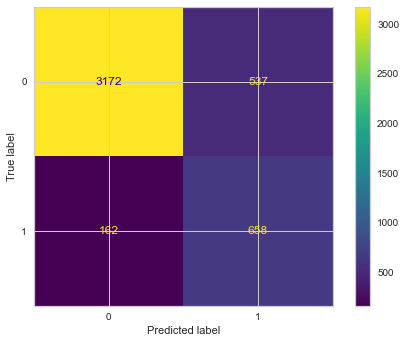

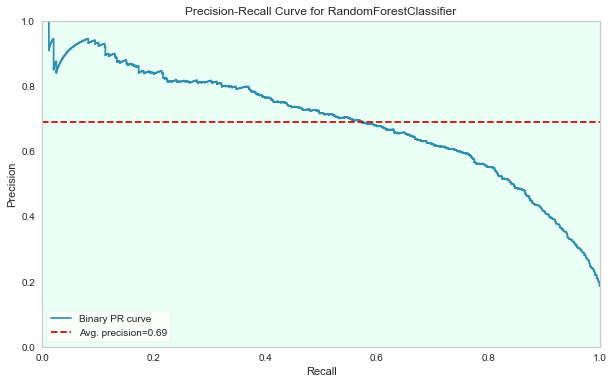

rf_Count_rec :  [0.85521704 0.80243902]
rf_Count_f1  :  [0.90075252 0.65310174]
rf_Count_AP (avg. precision from precision recall curve)  :  0.6904030468055712
 accuracy             score for rf_Count : 0.8472838296259187

 precision-0          score for rf_Count : 0.9473904343128057

 recall-0             score for rf_Count : 0.8613714641952915

 f1-0                 score for rf_Count : 0.9022953179015092

 precision-1          score for rf_Count : 0.5560550478694767

 recall-1             score for rf_Count : 0.7836116465267996

 f1-1                 score for rf_Count : 0.6502697291286966



In [173]:
# RANDOM FOREST WITH COUNT VECTORIZER


from sklearn.ensemble import RandomForestClassifier

rf_count = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
rf_count.fit(X_train_count, y_train)

print("RF_Count Model")
print("--------------")
eval(rf_count, X_train_count, X_test_count)

import random
import pylab as pl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


# To draw a precision-recall curve

from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1), classes = rf_count.classes_, per_class = True, cmap = "Set1")

# ! NOTE ! THIS PRECISIONRECALL FUNCTION ONLY WORKED WHEN I INTERCHANGED THE LABEL OF THE CLASSES using MAP WHEN ASSIGNING X AND Y!!
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

y_pred = rf_count.predict(X_test_count)
# SINCE average is None, scores output are for both the 0: recommended and 1: not recommended class
rf_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
rf_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
rf_count_AP = viz.score_


#print("viz.score_       : ", viz.score_)
print("rf_Count_rec : ", rf_count_rec)
print("rf_Count_f1  : ", rf_count_f1)
print("rf_Count_AP (avg. precision from precision recall curve)  : ", rf_count_AP)



# CROSS VALIDATION

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# EVALUATES AND PUT LABELS ON DIFFERENT SCORES LIKE ACCURACY. AND PRECISION, RECALL, F1 SCORE FOR BOTH CLASSES 0 AND 1

custom_scorer = {'accuracy': make_scorer(accuracy_score), 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }


for i, j in custom_scorer.items():
  # i is the key label, j is the action/command of that key item
  # instantiate rf model
  model = RandomForestClassifier(n_estimators = 200, max_depth = 12, class_weight = "balanced", random_state = 101, n_jobs = -1)
  # crossvalscore will output multiple accuracies (or whichever parameter we specify for the model, considering different random selections of test and train data sets)
  # Mean of the scores given by cross val:
  scores = cross_val_score(estimator = model, X = X_train_count, y = y_train, cv = 10, scoring= j).mean()
  # saving recall and f1 of class 0 : recommend
  if i == "recall-1":
    rf_count_rec = scores
  elif i == "f1-1":
    rf_count_f1 = scores
  # print all the scores
  print(f" {i:20} score for rf_Count : {scores}\n")




Random Forest TF-IDF Model
-------------------
Test_SET
[[3133  576]
 [ 166  654]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      3709
           1       0.53      0.80      0.64       820

    accuracy                           0.84      4529
   macro avg       0.74      0.82      0.77      4529
weighted avg       0.87      0.84      0.85      4529

Train_SET
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     14831
           1       0.61      0.90      0.72      3281

    accuracy                           0.88     18112
   macro avg       0.79      0.89      0.82     18112
weighted avg       0.91      0.88      0.88     18112



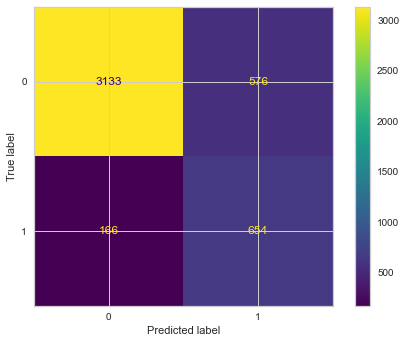

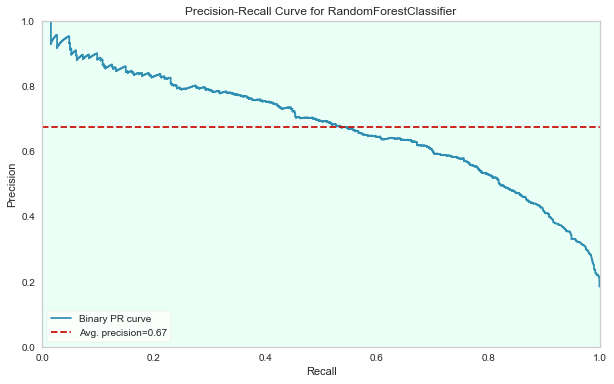

rf_tfidf_rec :  [0.84470208 0.79756098]
rf_tfidf_f1  :  [0.894121   0.63804878]
rf_tfidf_AP (avg. precision from precision recall curve)  :  0.6747426653341159
 accuracy             score for rf_tfidf : 0.839664674914034

 precision-0          score for rf_tfidf : 0.9489401573132872

 recall-0             score for rf_tfidf : 0.84997714438388

 f1-0                 score for rf_tfidf : 0.8966756501848325

 precision-1          score for rf_tfidf : 0.5396922933017213

 recall-1             score for rf_tfidf : 0.7930573059529988

 f1-1                 score for rf_tfidf : 0.6419593377296993



In [174]:

# RANDOM FOREST

print("Random Forest TF-IDF Model")
print("-------------------")



rf_tfidf = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
rf_tfidf.fit(X_train_tf_idf, y_train)

eval(rf_tfidf, X_train_tf_idf, X_test_tf_idf)

import random
import pylab as pl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


# To draw a precision-recall curve

from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1), classes = rf_tfidf.classes_, per_class = True, cmap = "Set1")

# ! NOTE ! THIS PRECISION-RECALL FUNCTION ONLY WORK WHEN I INTERCHANGED THE LABEL OF THE CLASSES using MAP WHEN ASSIGNING X AND Y!
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

y_pred = rf_tfidf.predict(X_test_tf_idf)
# SINCE average is None, scores output are for both the 0: recommended and 1: not recommended class
rf_tfidf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
rf_tfidf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
rf_tfidf_AP = viz.score_


#print("viz.score_       : ", viz.score_)
print("rf_tfidf_rec : ", rf_tfidf_rec)
print("rf_tfidf_f1  : ", rf_tfidf_f1)
print("rf_tfidf_AP (avg. precision from precision recall curve)  : ", rf_tfidf_AP)



# CROSS VALIDATION

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# EVALUATES AND PUT LABELS ON DIFFERENT SCORES LIKE ACCURACY. AND PRECISION, RECALL, F1 SCORE FOR BOTH CLASSES 0 AND 1

custom_scorer = {'accuracy': make_scorer(accuracy_score), 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }


for i, j in custom_scorer.items():
  # i is the key label, j is the action/command of that key item
  # instantiate rf model
  model = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
  # crossvalscore will output multiple accuracies (or whichever parameter we specify for the model, considering different random selections of test and train data sets)
  # Mean of the scores given by cross val:
  scores = cross_val_score(estimator = model, X = X_train_tf_idf, y = y_train, cv = 10, scoring= j).mean()
  # saving recall and f1 of class 0 : recommend
  if i == "recall-1":
    rf_tfidf_rec = scores
  elif i == "f1-1":
    rf_tfidf_f1 = scores
  # print all the scores
  print(f" {i:20} score for rf_tfidf : {scores}\n")





In [203]:
# COMPARE MODELS


compare = pd.DataFrame({"Model":["NaiveBayes(Multi)_Count", "LogReg_Count", "SVM_Count",
                                  "Random Forest_Count", "NaiveBayes(Multi)_TFIDF",
                                  "LogReg_TFIDF", "SVM_TFIDF", "Random Forest_TFIDF" ],
                        "F1_Score": [nbmulti_count_f1,log_count_f1,svc_count_f1,rf_count_f1,nbmulti_tfidf_f1
                                     , log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1],
                        "Recall_Score": [nbmulti_count_rec,log_count_rec,svc_count_rec,rf_count_rec,nbmulti_tfidf_rec
                                     , log_tfidf_rec, svc_tfidf_rec, rf_tfidf_rec],
                        "Average_Precision_Score": [nbmulti_AP,log_AP,svc_count_AP,rf_count_AP,nbmulti_tfidf_AP
                                     , log_tfidf_AP, svc_tfidf_AP, rf_tfidf_AP]})


compare = compare.sort_values(by="Recall_Score", ascending = True)

fig = px.bar(compare, x = "Recall_Score", y = "Model", title = "Recall_Score")

fig.show()
fig.write_image('Recall-all.png')

compare = compare.sort_values(by="F1_Score", ascending = True)

fig = px.bar(compare, x = "F1_Score", y = "Model", title = "F1_Score")

fig.show()
fig.write_image('F1-all.png')

compare = compare.sort_values(by="Average_Precision_Score", ascending = True)

fig = px.bar(compare, x = "Average_Precision_Score", y = "Model", title = "Average_Precision_Score")

fig.show()
fig.write_image('AP-all.png')

In [207]:
compare['mean'] = compare.mean(axis=1)

In [208]:
compare = compare.sort_values(by="mean", ascending = False)
compare

,Model,F1_Score,Recall_Score,Average_Precision_Score,mean
5,LogReg_TFIDF,0.914,0.872,0.757,0.848
1,LogReg_Count,0.912,0.872,0.732,0.839
6,SVM_TFIDF,0.669,0.861,0.738,0.756
2,SVM_Count,0.687,0.826,0.729,0.747
0,NaiveBayes(Multi)_Count,0.694,0.743,0.722,0.720
3,Random Forest_Count,0.650,0.784,0.690,0.708
7,Random Forest_TFIDF,0.642,0.793,0.675,0.703
4,NaiveBayes(Multi)_TFIDF,0.272,0.160,0.730,0.388


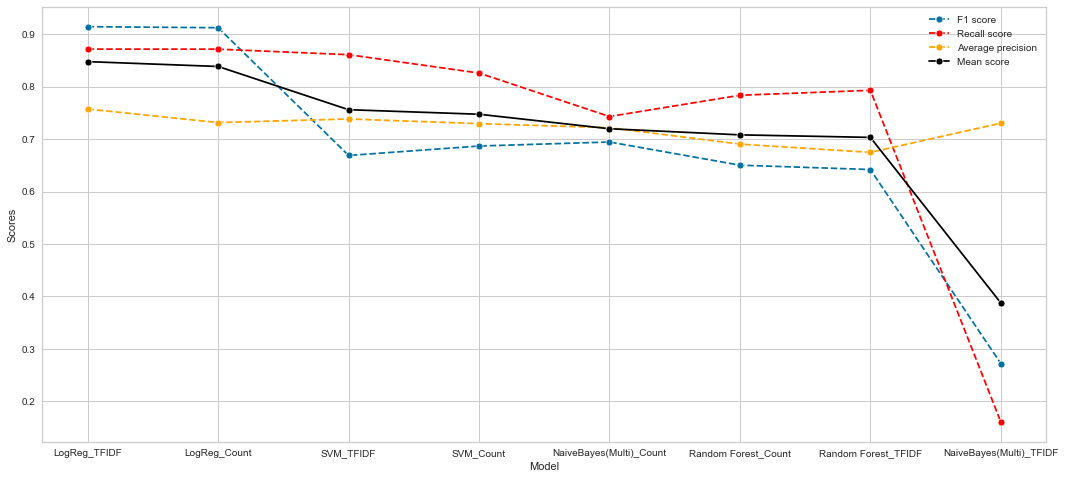

In [217]:
sns.lineplot(x='Model', y = 'F1_Score', data= compare, marker = 'o', label = 'F1 score',linestyle='--' )
sns.lineplot(x='Model', y = 'Recall_Score', data= compare, color = 'red', marker = 'o', label = 'Recall score', linestyle='--')
sns.lineplot(x='Model', y = 'Average_Precision_Score', data= compare, color = 'orange',  marker = 'o', label = 'Average precision', linestyle='--')
sns.lineplot(x='Model', y = 'mean', data= compare,color = 'black',  marker = 'o', label = 'Mean score')
#plt.legend(labels=["F1_score","Recall_Score","Average_Precision_Score","Mean"])
plt.ylabel('Scores')
plt.gcf().set_size_inches(18, 8)
plt.savefig('compare-models-all.png', dpi = 600, format = 'png', facecolor = 'white', bbox_inches='tight')
plt.show()